# Análisis explotario de datos Covid-19 #

En este archivo se tomará el archivo .csv que contiene el DataFrame conjunto de los productos ya investigados en la carpeta Covid-19 para la exploración y graficación de datos escenciales, haciendo una conexión con los datos de censo para un análisis basado en porcentajes poblacionales.

In [108]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import matplotlib.ticker as mtick

# Lectura CSV #

Leemos el archivo correspondiente de la carpeta Covid-19 y el archivo de censo.


In [109]:
ruta_archivo = os.path.join('..', '..', 'Data', 'Covid-19', 'covid-19_datos_por_comuna.csv')

df_covid = pd.read_csv(ruta_archivo, encoding='utf-8')

df_covid.head()

,Comuna,Año,Casos confirmados,Porcentaje promedio de cobertura de casos sospechosos,Total de casos positivos según el test PCR,Vacunados 1ra dosis,Vacunados 2da dosis,Vacunados dosis de refuerzo,Vacunados 4ta dosis,Vacunados unica dosis,Fallecidos por covid-19,Total fallecidos,Cant de transacciones BIP en 2020
0,Alhué,2020,16778.0,89.584211,99.0,0.0,0.0,0.0,0.0,0.0,6.0,83.0,NaN
1,Alhué,2021,70930.0,67.358824,271.4,7894.0,7538.0,5430.0,0.0,602.0,8.0,541.0,NaN
2,Alhué,2022,191187.0,88.466667,610.0,551.0,666.0,2516.0,6052.0,0.0,8.0,1088.0,NaN
3,Alhué,2023,5597.0,NaN,NaN,5.0,1.0,7.0,30.0,0.0,NaN,70.0,NaN
4,Buin,2020,160555.0,90.894737,90.1,0.0,0.0,0.0,0.0,0.0,158.0,1762.0,NaN


In [110]:
ruta = os.path.join('..', '..', 'Data', 'censo', 'estimacion_poblacion_por_comunas.csv')

df_censo = pd.read_csv(ruta, encoding='utf-8')
df_censo = df_censo[~df_censo['Año'].isin([2017, 2018, 2019, 2024])]

df_censo.head()


,Comuna,Año,Población
3,Santiago,2020,423042.857143
4,Santiago,2021,426996.142857
5,Santiago,2022,430949.428571
6,Santiago,2023,434902.714286
11,Cerrillos,2020,82070.142857


In [111]:
df = pd.merge(df_censo, df_covid, on=['Comuna', 'Año'], how='left')
df

,Comuna,Año,Población,Casos confirmados,Porcentaje promedio de cobertura de casos sospechosos,Total de casos positivos según el test PCR,Vacunados 1ra dosis,Vacunados 2da dosis,Vacunados dosis de refuerzo,Vacunados 4ta dosis,Vacunados unica dosis,Fallecidos por covid-19,Total fallecidos,Cant de transacciones BIP en 2020
0,Santiago,2020,423042.857143,939103.0,86.568421,73.2,1228.0,0.0,0.0,0.0,0.0,542.0,5629.0,15278353.0
1,Santiago,2021,426996.142857,3899492.0,88.121154,403.7,338702.0,326012.0,251288.0,0.0,14865.0,416.0,25461.0,NaN
2,Santiago,2022,430949.428571,11079721.0,89.902564,532.1,15783.0,20733.0,73303.0,260412.0,0.0,161.0,45460.0,NaN
3,Santiago,2023,434902.714286,282536.0,NaN,NaN,143.0,77.0,257.0,711.0,0.0,NaN,2924.0,NaN
4,Cerrillos,2020,82070.142857,189656.0,93.821053,64.0,0.0,0.0,0.0,0.0,0.0,126.0,1780.0,1616394.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Padre Hurtado,2023,78579.857143,40710.0,NaN,NaN,32.0,23.0,71.0,291.0,0.0,NaN,576.0,NaN
196,Peñaflor,2020,91554.571429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,Peñaflor,2021,92266.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,Peñaflor,2022,92978.285714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
# Pasamos columnas a porcentajes segpun población

df['% Vacunados 1ra dosis'] = df['Vacunados 1ra dosis'] / df['Población'] * 100
df['% Vacunados 2da dosis'] = df['Vacunados 2da dosis'] / df['Población'] * 100
df['% Vacunados 4ta dosis'] = df['Vacunados 4ta dosis'] / df['Población'] * 100
df['% Vacunados dosis de refuerzo'] = df['Vacunados dosis de refuerzo'] / df['Población'] * 100
df['% Fallecidos COVID'] = df['Fallecidos por covid-19'] / df['Población'] * 100
df['% Casos confirmados'] = df['Casos confirmados'] / df['Población'] * 100

df

,Comuna,Año,Población,Casos confirmados,Porcentaje promedio de cobertura de casos sospechosos,Total de casos positivos según el test PCR,Vacunados 1ra dosis,Vacunados 2da dosis,Vacunados dosis de refuerzo,Vacunados 4ta dosis,Vacunados unica dosis,Fallecidos por covid-19,Total fallecidos,Cant de transacciones BIP en 2020,% Vacunados 1ra dosis,% Vacunados 2da dosis,% Vacunados 4ta dosis,% Vacunados dosis de refuerzo,% Fallecidos COVID,% Casos confirmados
0,Santiago,2020,423042.857143,939103.0,86.568421,73.2,1228.0,0.0,0.0,0.0,0.0,542.0,5629.0,15278353.0,0.290278,0.000000,0.000000,0.000000,0.128119,221.987674
1,Santiago,2021,426996.142857,3899492.0,88.121154,403.7,338702.0,326012.0,251288.0,0.0,14865.0,416.0,25461.0,NaN,79.322028,76.350104,0.000000,58.850180,0.097425,913.238226
2,Santiago,2022,430949.428571,11079721.0,89.902564,532.1,15783.0,20733.0,73303.0,260412.0,0.0,161.0,45460.0,NaN,3.662379,4.811005,60.427508,17.009652,0.037359,2571.002597
3,Santiago,2023,434902.714286,282536.0,NaN,NaN,143.0,77.0,257.0,711.0,0.0,NaN,2924.0,NaN,0.032881,0.017705,0.163485,0.059094,NaN,64.965334
4,Cerrillos,2020,82070.142857,189656.0,93.821053,64.0,0.0,0.0,0.0,0.0,0.0,126.0,1780.0,1616394.0,0.000000,0.000000,0.000000,0.000000,0.153527,231.090130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Padre Hurtado,2023,78579.857143,40710.0,NaN,NaN,32.0,23.0,71.0,291.0,0.0,NaN,576.0,NaN,0.040723,0.029270,0.370324,0.090354,NaN,51.807170
196,Peñaflor,2020,91554.571429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,Peñaflor,2021,92266.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,Peñaflor,2022,92978.285714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Asegúremonos de cómo vienen los datos.

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Comuna                                                 200 non-null    object 
 1   Año                                                    200 non-null    int64  
 2   Población                                              200 non-null    float64
 3   Casos confirmados                                      192 non-null    float64
 4   Porcentaje promedio de cobertura de casos sospechosos  144 non-null    float64
 5   Total de casos positivos según el test PCR             144 non-null    float64
 6   Vacunados 1ra dosis                                    192 non-null    float64
 7   Vacunados 2da dosis                                    192 non-null    float64
 8   Vacunados dosis de refuerzo                       

Al estar bien los datos, con el tipo correcto, podemos empezar la investogación preliminar.

In [114]:
df.describe()

,Año,Población,Casos confirmados,Porcentaje promedio de cobertura de casos sospechosos,Total de casos positivos según el test PCR,Vacunados 1ra dosis,Vacunados 2da dosis,Vacunados dosis de refuerzo,Vacunados 4ta dosis,Vacunados unica dosis,Fallecidos por covid-19,Total fallecidos,Cant de transacciones BIP en 2020,% Vacunados 1ra dosis,% Vacunados 2da dosis,% Vacunados 4ta dosis,% Vacunados dosis de refuerzo,% Fallecidos COVID,% Casos confirmados
count,200.00000,200.000000,1.920000e+02,144.000000,144.000000,192.000000,192.000000,192.000000,192.000000,192.000000,144.000000,192.000000,3.400000e+01,192.000000,192.000000,192.000000,192.000000,144.000000,192.000000
mean,2021.50000,144255.612857,1.300095e+06,90.523371,347.411111,35079.583333,34305.968750,31624.734375,24220.052083,1139.031250,205.479167,11635.437500,3.025391e+06,25.183682,24.598786,17.053612,22.631054,0.140642,871.418268
std,1.12084,117946.283574,1.974066e+06,3.412656,211.136821,74843.368762,71405.674622,52347.578950,55607.753129,2646.076402,191.567402,14996.494847,2.976813e+06,42.525638,40.313741,30.913671,28.209020,0.078668,867.038809
min,2020.00000,6761.714286,5.042000e+03,67.358824,48.300000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,70.000000,6.529740e+05,0.000000,0.000000,0.000000,0.000000,0.034581,37.425250
25%,2020.75000,83369.892857,1.041328e+05,88.638462,91.675000,34.750000,0.750000,5.250000,0.000000,0.000000,73.000000,1598.500000,1.074948e+06,0.029820,0.004700,0.000000,0.035891,0.076314,109.063406
50%,2021.50000,113314.500000,4.749720e+05,91.115064,406.350000,866.500000,384.000000,1494.500000,15.000000,0.000000,156.000000,4928.000000,1.642164e+06,1.552067,2.002887,0.069788,8.596782,0.130698,469.824019
75%,2022.25000,159298.535714,1.724570e+06,92.667308,520.500000,15307.250000,20103.750000,46015.500000,2646.250000,248.000000,278.750000,17417.500000,4.392760e+06,22.767795,22.992726,10.910951,36.125444,0.188215,1519.422852
max,2023.00000,567236.000000,1.345048e+07,97.089474,685.500000,383620.000000,366020.000000,272476.000000,289014.000000,16826.000000,1057.000000,94485.000000,1.527835e+07,170.567656,166.252781,137.864510,134.046183,0.408447,2655.803863


# Análisis de muertes covid-19 y muertes totales:

In [115]:
total_fallecidos = df['Total fallecidos'].sum()
total_fallecidos_covid = df['Fallecidos por covid-19'].sum()
total_otras_causas = total_fallecidos - total_fallecidos_covid

porcentaje_covid = (total_fallecidos_covid / total_fallecidos) * 100
porcentaje_otras = 100 - porcentaje_covid

print(f"Total fallecidos (todas las causas): {total_fallecidos:,}")
print(f"Total fallecidos por COVID-19: {total_fallecidos_covid:,}")
print(f"Total fallecidos por otras causas: {total_otras_causas:,}")
print(f"Porcentaje de muertes por COVID-19: {porcentaje_covid:.2f}%")
print(f"Porcentaje de muertes por otras causas: {porcentaje_otras:.2f}%")


Total fallecidos (todas las causas): 2,234,004.0
Total fallecidos por COVID-19: 29,589.0
Total fallecidos por otras causas: 2,204,415.0
Porcentaje de muertes por COVID-19: 1.32%
Porcentaje de muertes por otras causas: 98.68%


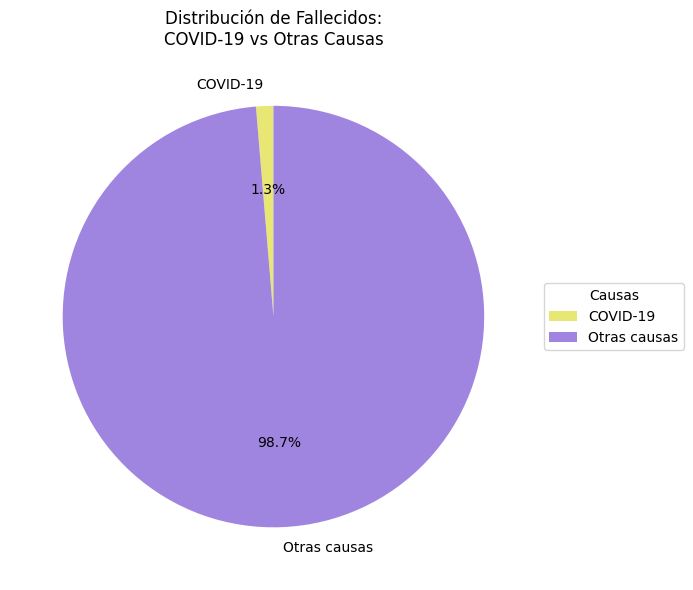

In [116]:
fig, ax = plt.subplots(figsize=(10, 6))
labels = ['COVID-19', 'Otras causas']
sizes = [total_fallecidos_covid, total_fallecidos - total_fallecidos_covid]
colors = ["#e9e773", "#a085e0"]

wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors,
                                  autopct='%1.1f%%', startangle=90)

ax.legend(wedges, labels, title="Causas", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title('Distribución de Fallecidos:\nCOVID-19 vs Otras Causas')

plt.tight_layout()
plt.show()


Notamos que la ditribución de las muertes a causa de Covid-19 con respecto a otras muertes es pequeña en porcentaje, sin embargo, pasemos a ver cómo afcetó esto por comuna:

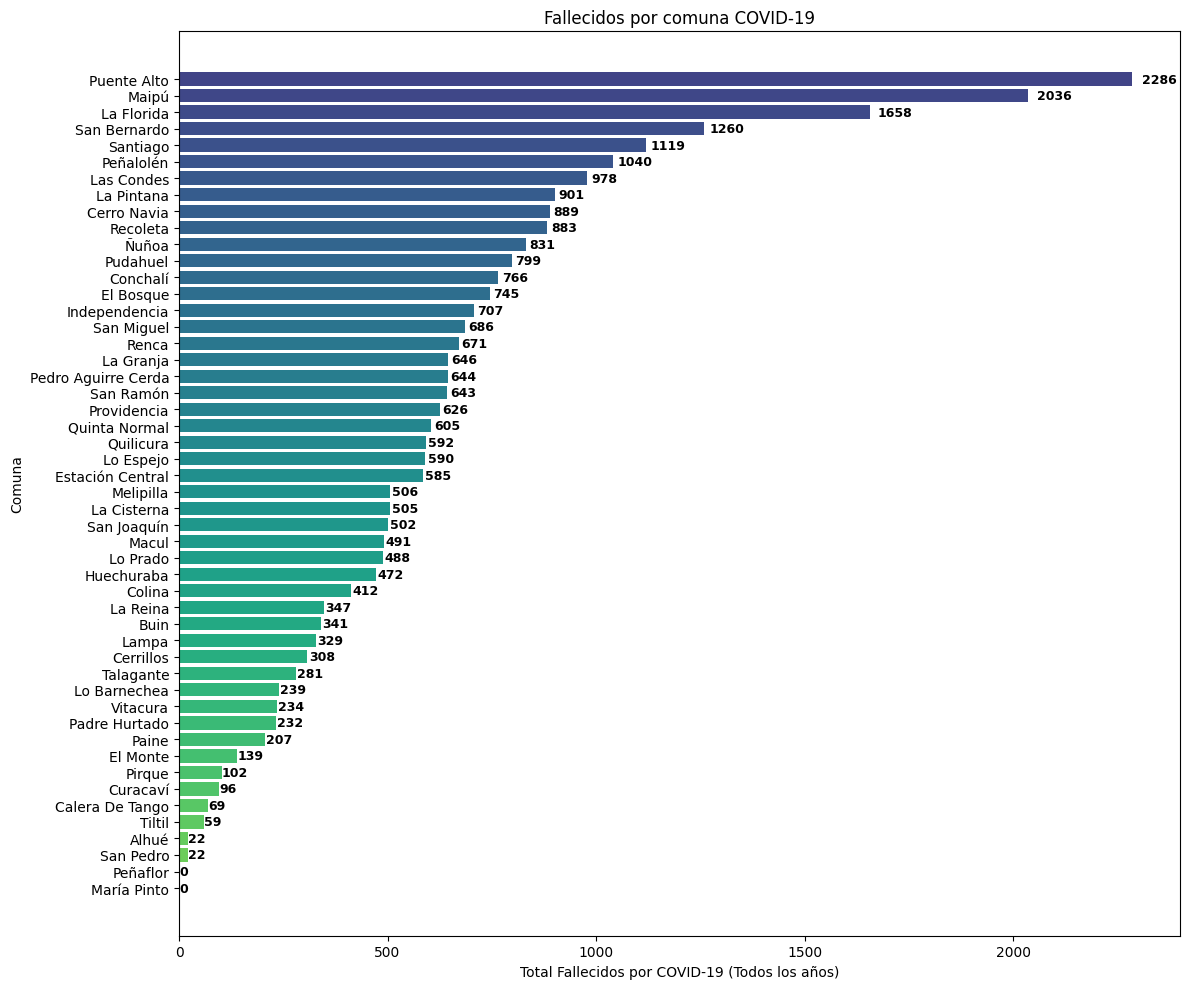

In [117]:
fallecidos_por_comuna = df.groupby('Comuna')['Fallecidos por covid-19'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 10))
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(fallecidos_por_comuna)))

bars = plt.barh(range(len(fallecidos_por_comuna)), fallecidos_por_comuna, color=colors)
plt.ylabel('Comuna')
plt.xlabel('Total Fallecidos por COVID-19 (Todos los años)')
plt.title('Fallecidos por comuna COVID-19')
plt.yticks(range(len(fallecidos_por_comuna)), fallecidos_por_comuna.index)

for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + width*0.01, bar.get_y() + bar.get_height()/2, f'{int(width)}', 
             ha='left', va='center', fontweight='bold', fontsize=9)

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Sin embargo, de aquí no podemos sacar conclusiones apresuradas: para hacer una buena comparación acerca de cómo afectó realmente en las muertes totales, deberíamos sacar los datos del Censo y sacar la cantidad de muertes respecto a la población de cada comuna para medir el impacto real. Esto, sin embargo, se puede realizar luego con los datos de los otros datasets trabajados en el repositorio, veamoslo a continuación:

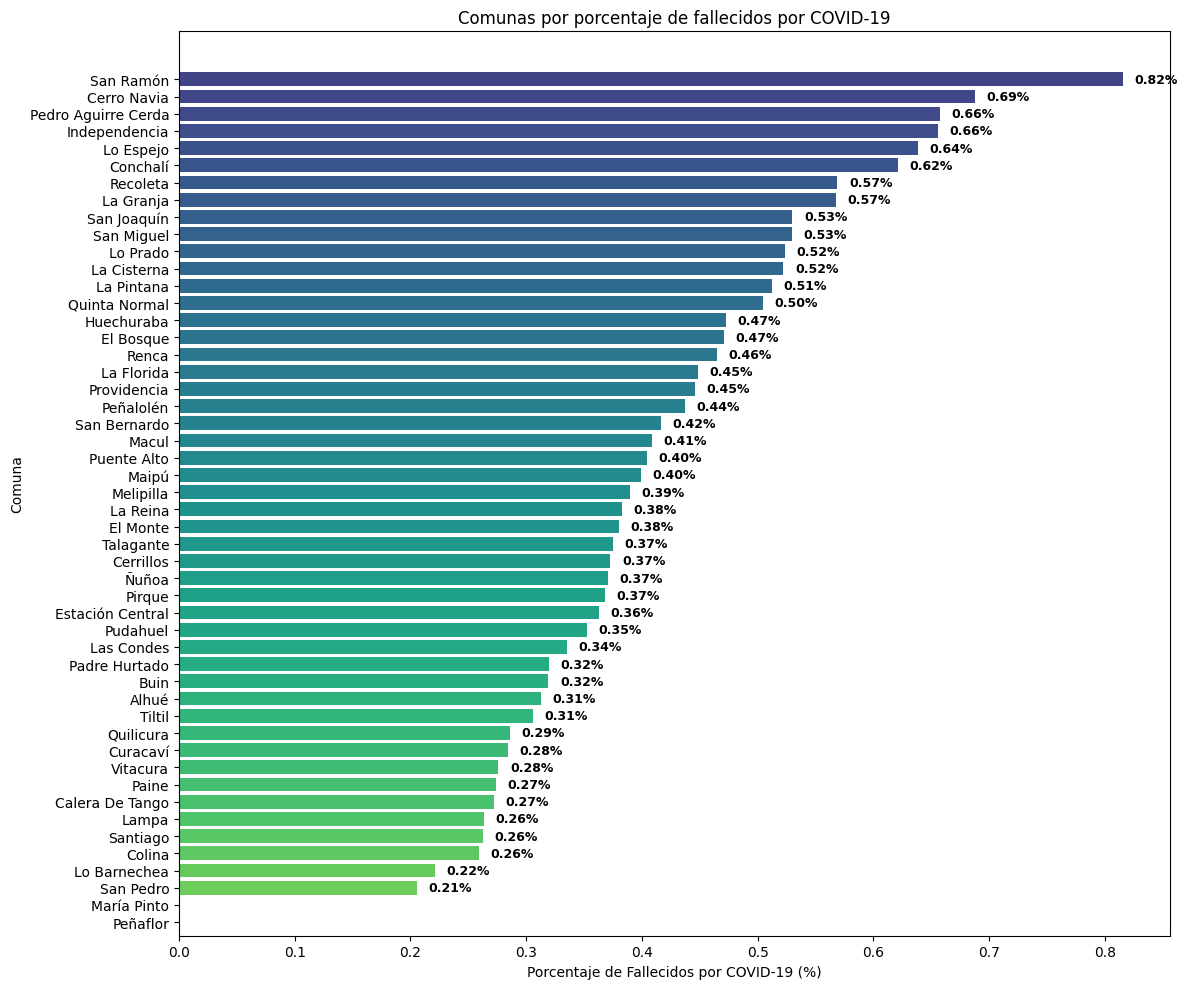

In [118]:
porcentaje_por_comuna = df.groupby('Comuna')['% Fallecidos COVID'].sum(min_count=1).sort_values(ascending=False)
plt.figure(figsize=(12, 10))
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(porcentaje_por_comuna)))

bars = plt.barh(range(len(porcentaje_por_comuna)), porcentaje_por_comuna, color=colors)
plt.ylabel('Comuna')
plt.xlabel('Porcentaje de Fallecidos por COVID-19 (%)')
plt.title('Comunas por porcentaje de fallecidos por COVID-19')
plt.yticks(range(len(porcentaje_por_comuna)), porcentaje_por_comuna.index)

# Añadir etiquetas
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', 
             ha='left', va='center', fontweight='bold', fontsize=9)

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Podemos ver un claro cambio en cuanto a las comunas afectadas. Un mayor análisis se hará al juntar etsos datos con los datos socioeconómicos.

# Cantidad de vacunados por comuna

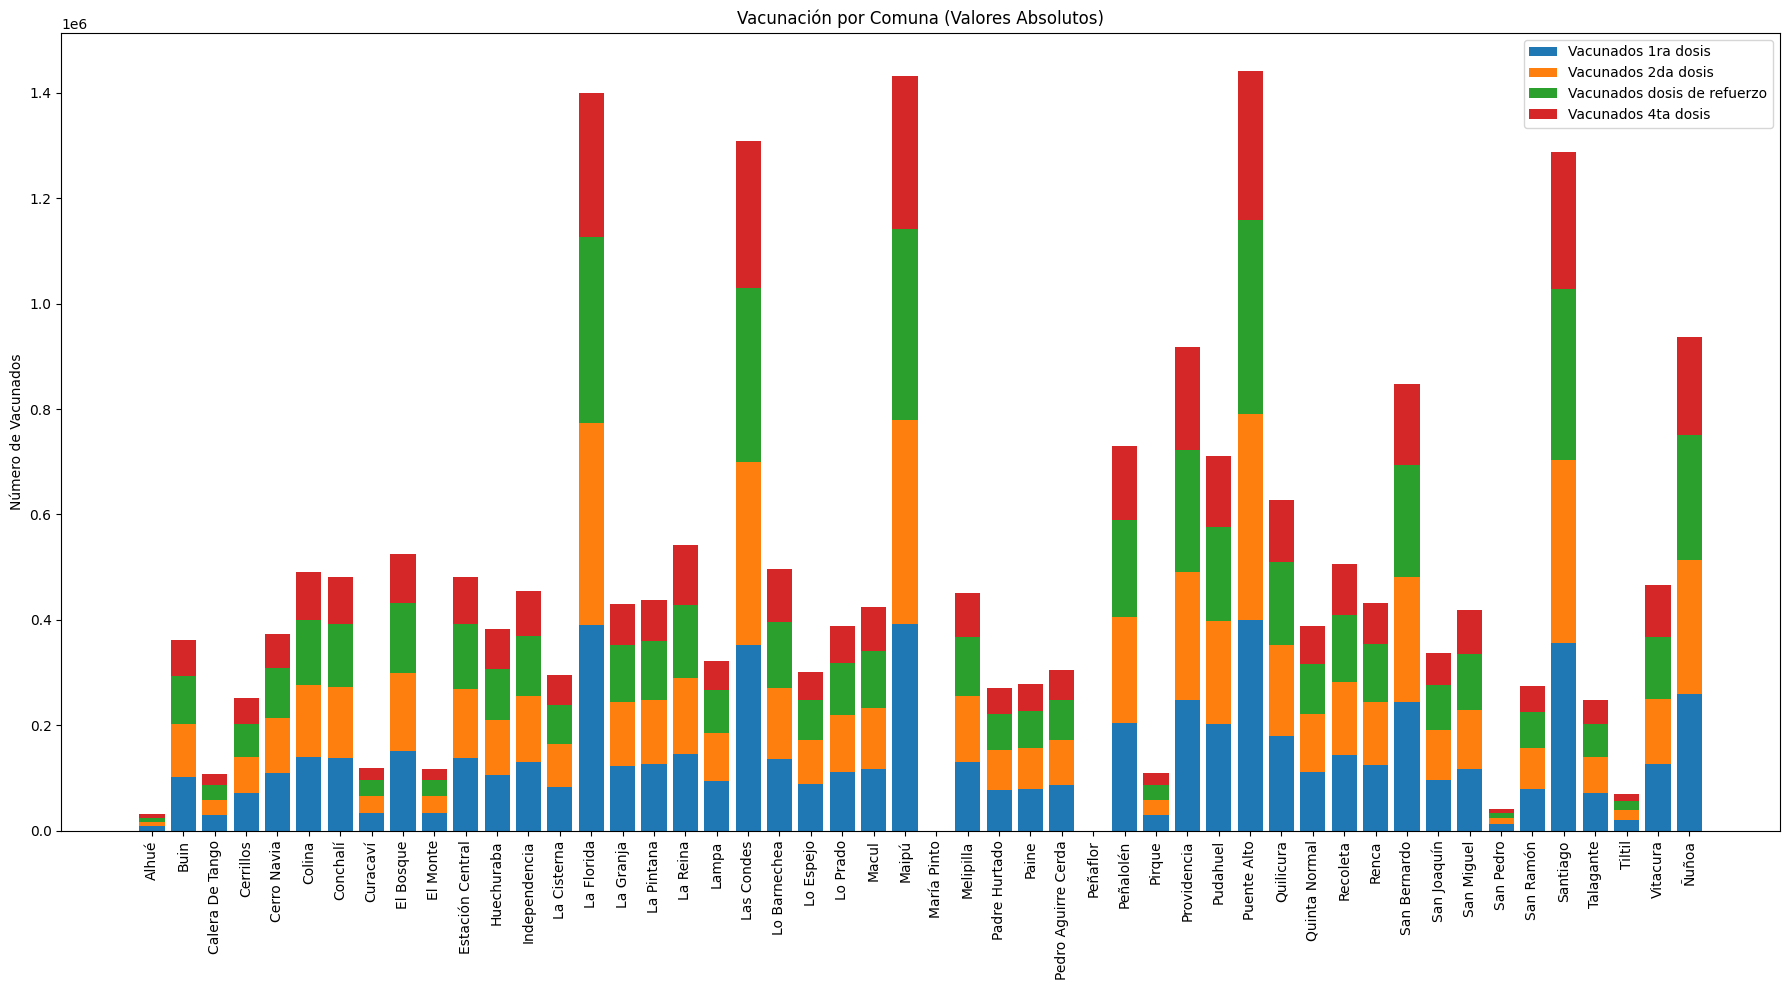

In [119]:

# Agrupamos por comuna
vacunacion_por_comuna = df.groupby('Comuna')[[
    'Vacunados 1ra dosis', 'Vacunados 2da dosis', 
    'Vacunados dosis de refuerzo', 'Vacunados 4ta dosis'
]].sum()

# Graficar todas las comunas
vac_cols = ['Vacunados 1ra dosis', 'Vacunados 2da dosis', 'Vacunados dosis de refuerzo', 'Vacunados 4ta dosis']
bottom = np.zeros(len(vacunacion_por_comuna))

plt.figure(figsize=(18, 10))

for col in vac_cols:
    plt.bar(range(len(vacunacion_por_comuna)), vacunacion_por_comuna[col], bottom=bottom, label=col)
    bottom += vacunacion_por_comuna[col].values

plt.title('Vacunación por Comuna (Valores Absolutos)')
plt.ylabel('Número de Vacunados')
plt.xticks(range(len(vacunacion_por_comuna)), vacunacion_por_comuna.index, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

Nuevamente, nos vemos algo limitados sin la información de la población total, puesto que las comunas de mayor vacunación y las comunas con mayor cantidad de fallecidos por covid son casi las mismas, podemos concluir que esto se debe más a la cantidad de población que realmente una correlación de mayor cantidad de vacunados - mayor cantidad de muertes. Veamos entonces por porcentajes:

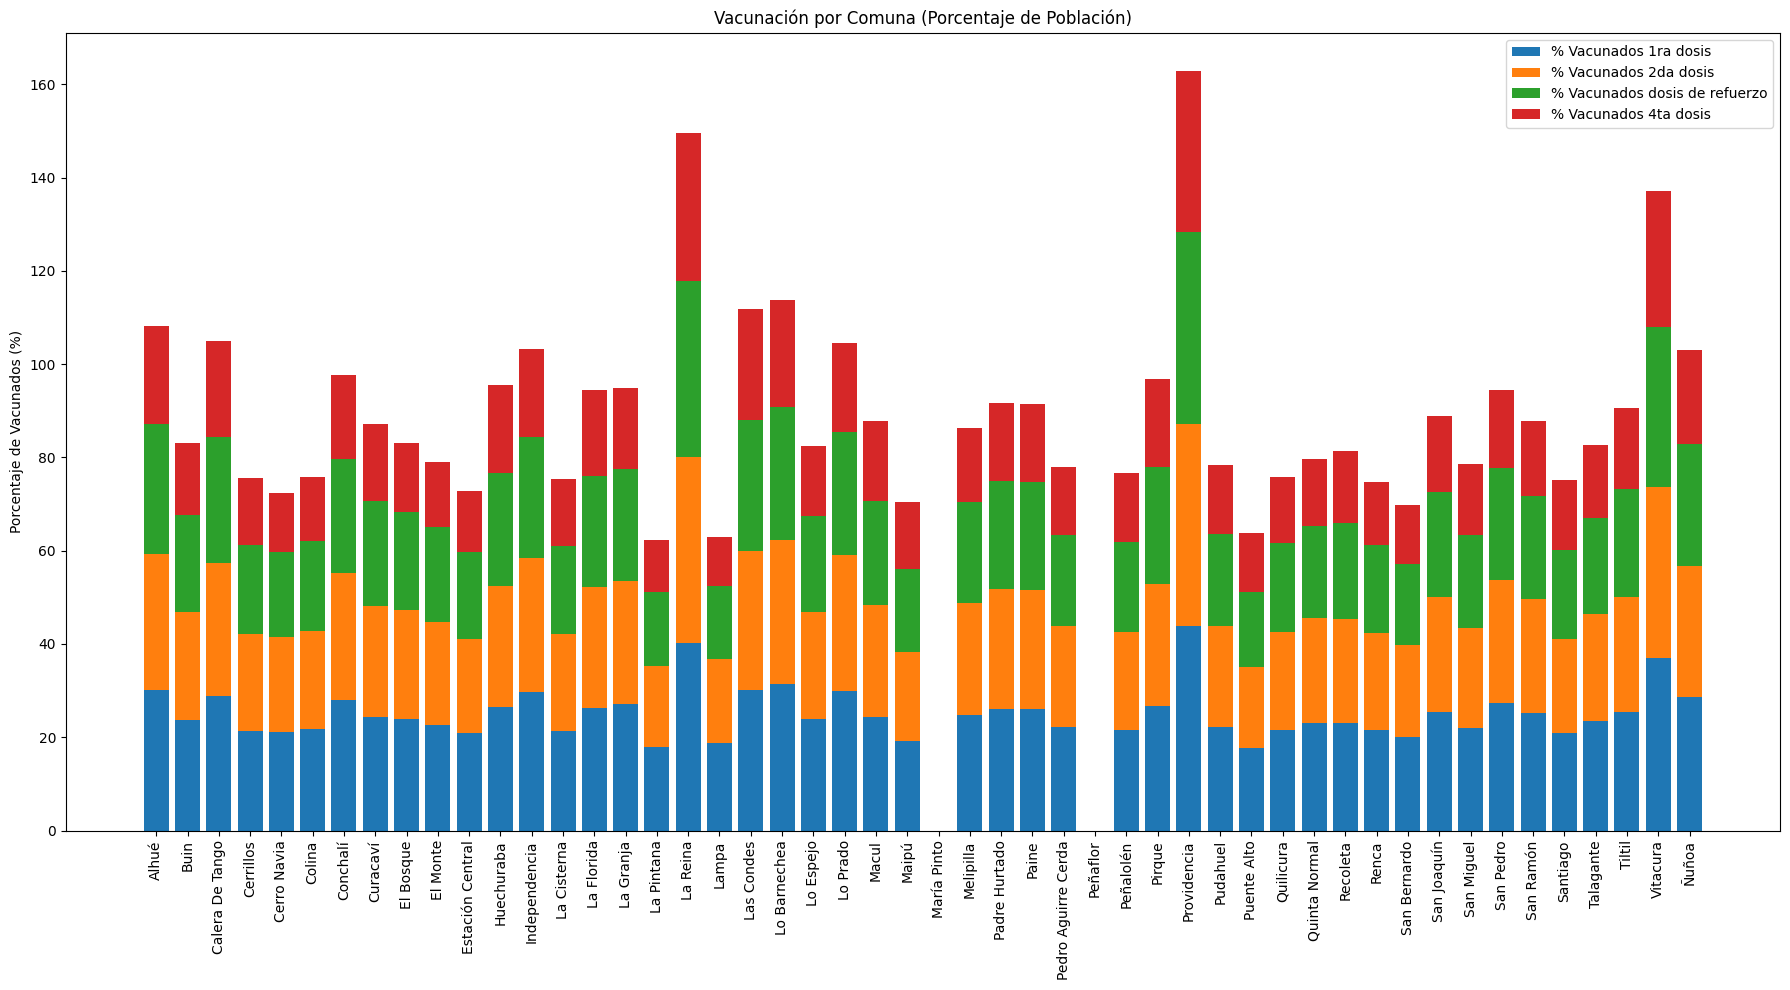

In [120]:
# Agrupamos por comuna y tomamos los promedios de porcentaje
vacunacion_por_comuna_pct = df.groupby('Comuna')[[
    '% Vacunados 1ra dosis', '% Vacunados 2da dosis',
    '% Vacunados dosis de refuerzo', '% Vacunados 4ta dosis'
]].mean() # ya son porcentajes

vac_cols_pct = ['% Vacunados 1ra dosis', '% Vacunados 2da dosis', 
                '% Vacunados dosis de refuerzo', '% Vacunados 4ta dosis']
bottom = np.zeros(len(vacunacion_por_comuna_pct))

plt.figure(figsize=(18, 10))

for col in vac_cols_pct:
    plt.bar(range(len(vacunacion_por_comuna_pct)), vacunacion_por_comuna_pct[col], 
            bottom=bottom, label=col)
    bottom += vacunacion_por_comuna_pct[col].values

plt.title('Vacunación por Comuna (Porcentaje de Población)')
plt.ylabel('Porcentaje de Vacunados (%)')
plt.xticks(range(len(vacunacion_por_comuna_pct)), vacunacion_por_comuna_pct.index, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


# Casos positivos confirmados a través de los años

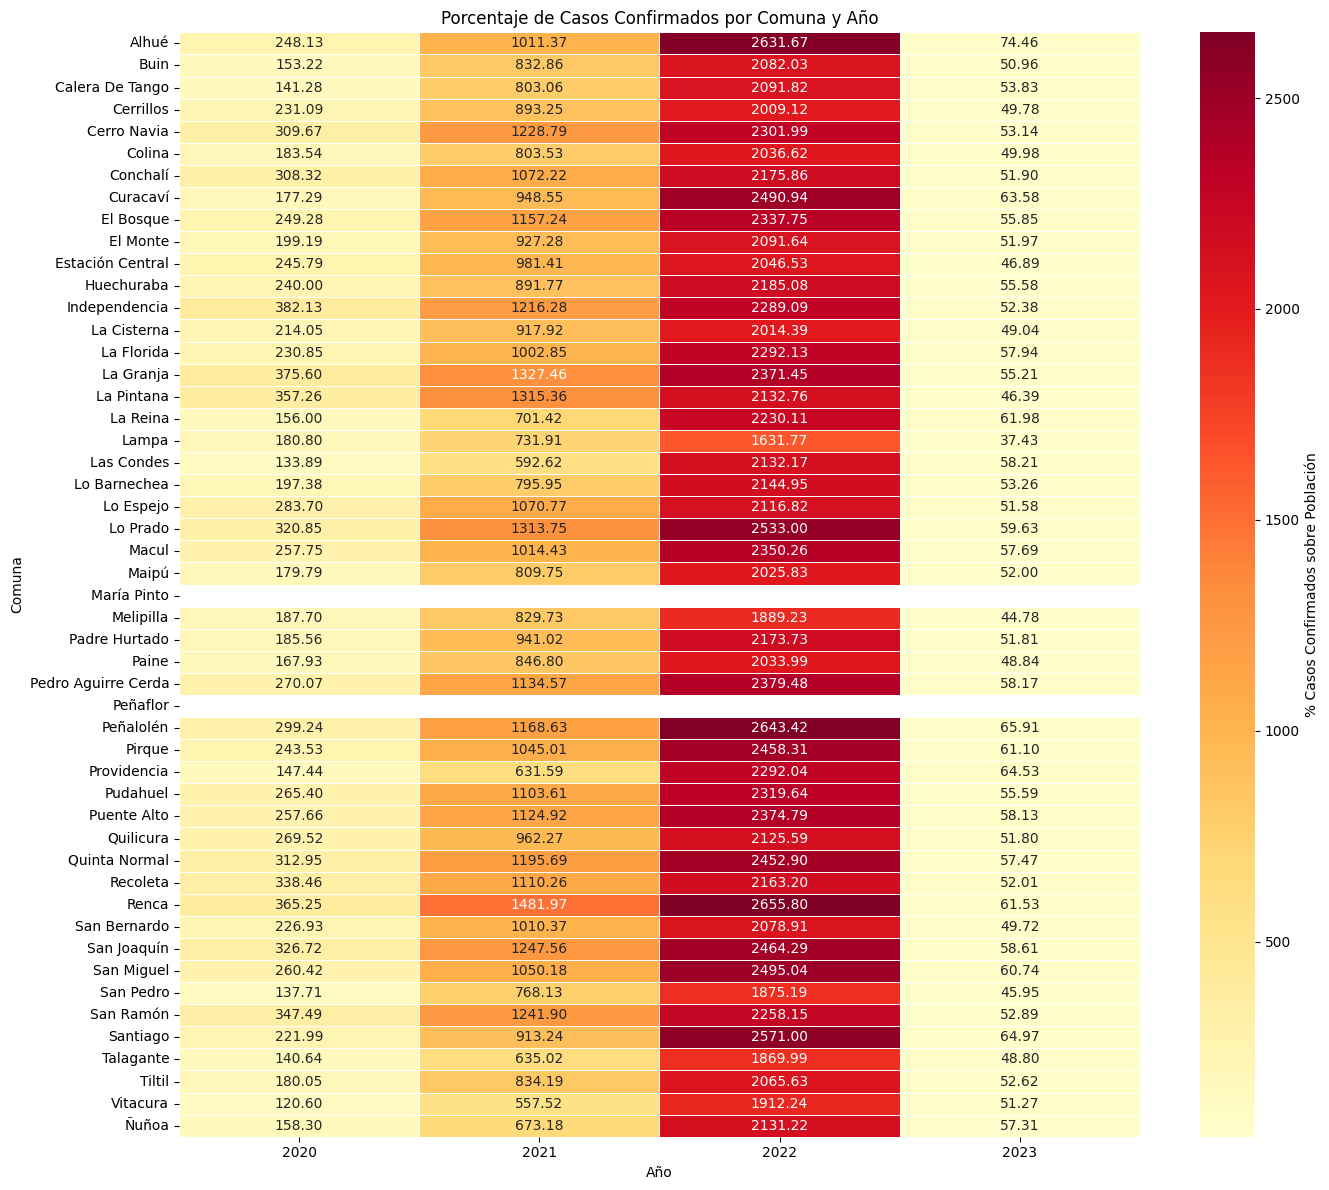

In [121]:
# Creamos un HeatMap para comparar todas las comunas

df['% Casos sobre población'] = (df['Casos confirmados'] / df['Población']) * 100
heatmap_data_pct = df.pivot(index='Comuna', columns='Año', values='% Casos sobre población')

plt.figure(figsize=(14, 12))
sns.heatmap(heatmap_data_pct, cmap='YlOrRd', annot=True, fmt='.2f', linewidths=0.5,
            cbar_kws={'label': '% Casos Confirmados sobre Población'})
plt.title('Porcentaje de Casos Confirmados por Comuna y Año')
plt.xlabel('Año')
plt.ylabel('Comuna')
plt.tight_layout()
plt.show()


# Cobertura de casos sospechosos según comuna

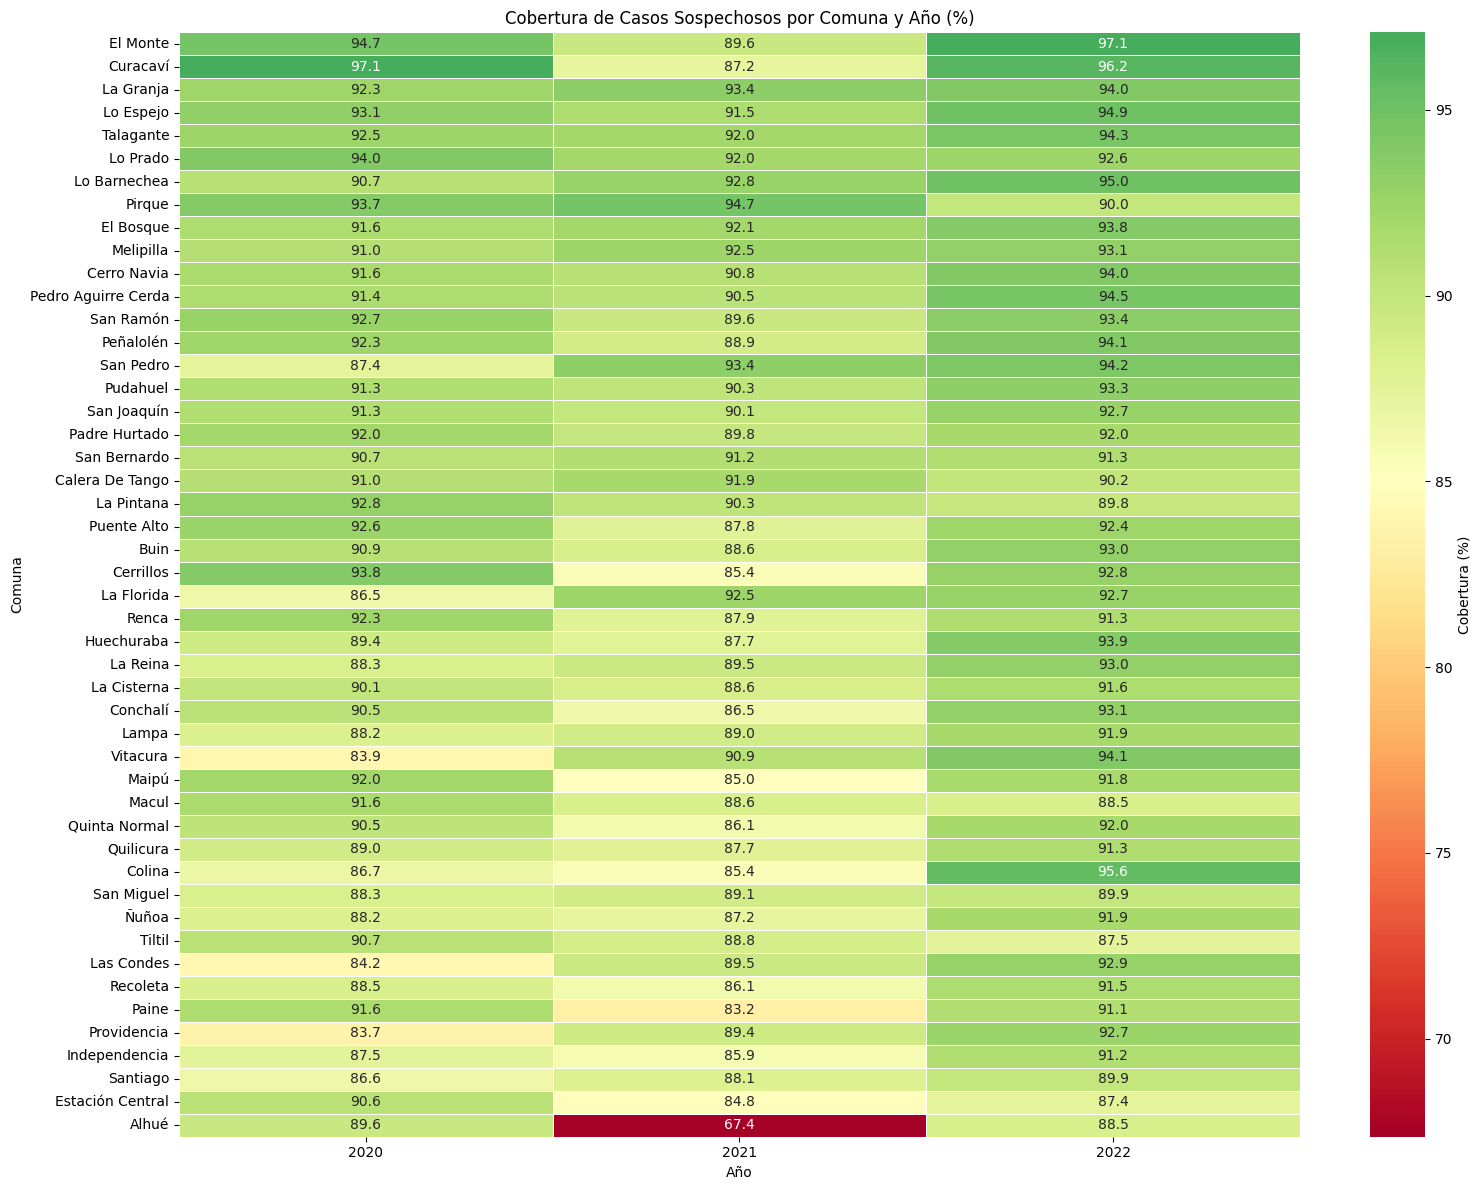

Promedio general: 90.5%
Máxima cobertura promedio: 93.8% (El Monte)
Mínima cobertura promedio: 81.8% (Alhué)


In [122]:
cobertura_por_año_comuna = df.pivot_table(index='Comuna', columns='Año', values='Porcentaje promedio de cobertura de casos sospechosos')

cobertura_promedio = cobertura_por_año_comuna.mean(axis=1)
cobertura_ordenada = cobertura_por_año_comuna.loc[cobertura_promedio.sort_values(ascending=False).index]

# Heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(
    cobertura_ordenada,
    annot=True, 
    fmt='.1f',
    cmap='RdYlGn',
    center=85,
    linewidths=0.5,
    cbar_kws={'label': 'Cobertura (%)'}
)
plt.title('Cobertura de Casos Sospechosos por Comuna y Año (%)')
plt.xlabel('Año')
plt.ylabel('Comuna')
plt.tight_layout()
plt.show()

print(f"Promedio general: {cobertura_ordenada.mean().mean():.1f}%")
max_comuna = cobertura_ordenada.mean(axis=1).idxmax()
min_comuna = cobertura_ordenada.mean(axis=1).idxmin()
print(f"Máxima cobertura promedio: {cobertura_ordenada.mean(axis=1).max():.1f}% ({max_comuna})")
print(f"Mínima cobertura promedio: {cobertura_ordenada.mean(axis=1).min():.1f}% ({min_comuna})")


Notamos algo curioso: recordemos que en nuestro dataframe, la cobertura de datos sospechosos venía dada por porcentaje. Notemos que, de todos los mapas anteriores, este es el único que la máxima cobertura no es una comuna de gran población (Maipú, Puente Alto, La Florida, Las Condes, etc.), lo que refuerza la idea de que los datos de población y los porcentajes respecto a esta última son extremadamente necesarios para una investigación y un análisis con base.

# Transacciones BIP por comuna

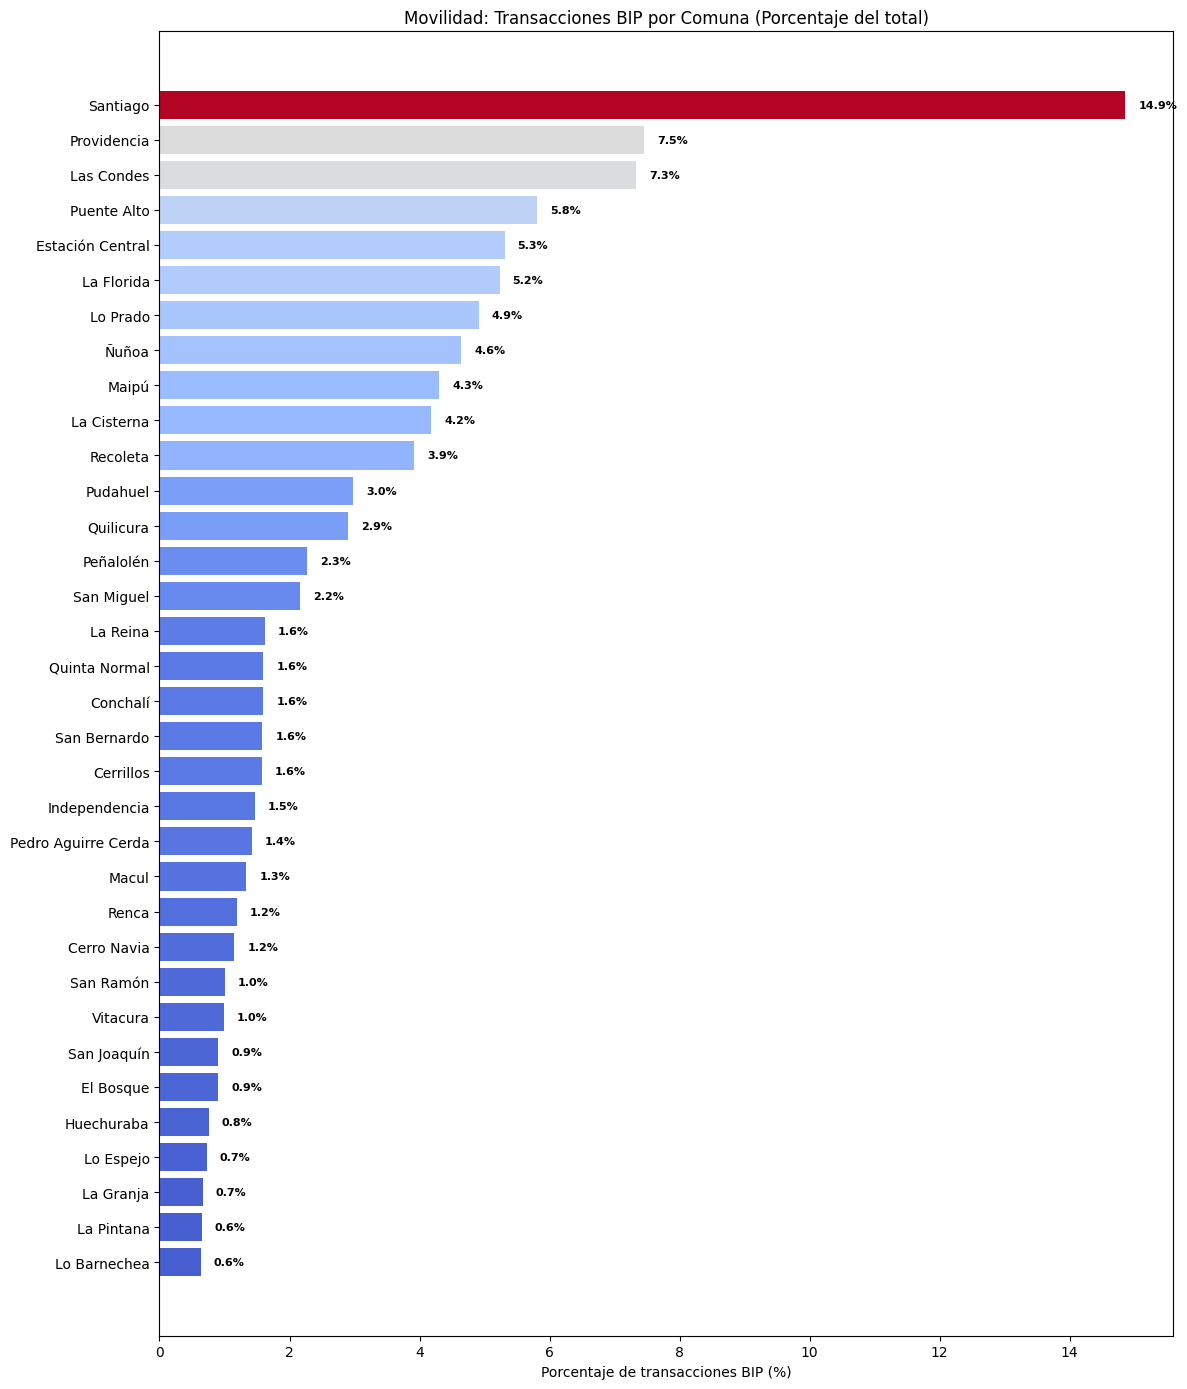

In [123]:

# Consulta a IA generativa: '¿Cómo puedo trabajar con números tan grandes al graficarlos para que no queden números ilegibles?'

bip_data = df[['Comuna', 'Cant de transacciones BIP en 2020']].drop_duplicates().dropna()
bip_data = bip_data.sort_values('Cant de transacciones BIP en 2020', ascending=False)
total_transacciones = bip_data['Cant de transacciones BIP en 2020'].sum()
bip_data['% Transacciones'] = bip_data['Cant de transacciones BIP en 2020'] / total_transacciones * 100

colors_bip = plt.cm.coolwarm(bip_data['% Transacciones'] / bip_data['% Transacciones'].max())

plt.figure(figsize=(12, 14))
bars = plt.barh(range(len(bip_data)), bip_data['% Transacciones'], color=colors_bip)
plt.yticks(range(len(bip_data)), bip_data['Comuna'])
plt.xlabel('Porcentaje de transacciones BIP (%)')
plt.title('Movilidad: Transacciones BIP por Comuna (Porcentaje del total)')
plt.gca().invert_yaxis()

# Formatear números en porcentaje
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.2, bar.get_y() + bar.get_height()/2, f'{width:.1f}%', 
             ha='left', va='center', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()


La transacciones BIP pueden venir por muchos factores que, de ser congruente a la investigación, exploraremos más adelante. Sin embargo, por el momento es ideal ver si las transaccciones BIP y las muertes por covid-19 tienen alguna relación:

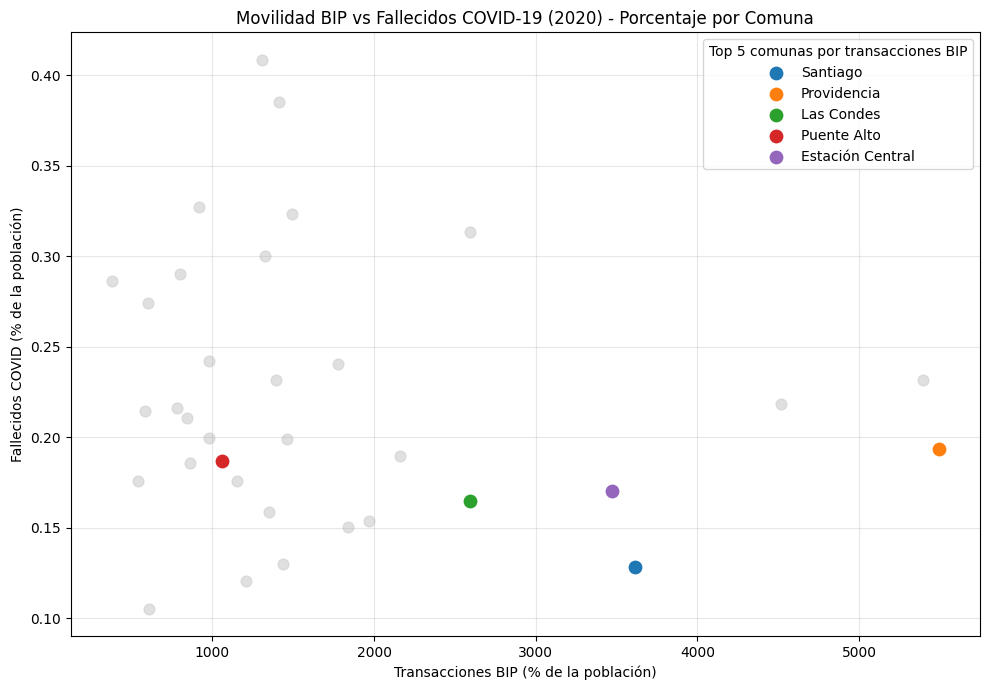

In [124]:
combinado_data = df[df['Año'] == 2020][['Comuna', 'Cant de transacciones BIP en 2020', 
                                         'Fallecidos por covid-19', 'Población']].dropna()
combinado_data['% Transacciones BIP'] = (combinado_data['Cant de transacciones BIP en 2020'] / 
                                         combinado_data['Población']) * 100
combinado_data['% Fallecidos COVID'] = (combinado_data['Fallecidos por covid-19'] / 
                                        combinado_data['Población']) * 100

plt.figure(figsize=(10,7))

plt.scatter(combinado_data['% Transacciones BIP'], 
            combinado_data['% Fallecidos COVID'], 
            color='lightgray', alpha=0.7, s=60, label='_nolegend_')

top_comunas = combinado_data.nlargest(5, 'Cant de transacciones BIP en 2020')
colors = sns.color_palette("tab10", len(top_comunas))

for i, row in enumerate(top_comunas.itertuples()):
    plt.scatter(row._5, row._6, color=colors[i], s=80, label=row.Comuna)  # columnas calculadas: 5 y 6

plt.xlabel('Transacciones BIP (% de la población)')
plt.ylabel('Fallecidos COVID (% de la población)')
plt.title('Movilidad BIP vs Fallecidos COVID-19 (2020) - Porcentaje por Comuna')

plt.legend(title='Top 5 comunas por transacciones BIP')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



Notamos que no existe correlación entre el pasaje BIP y los contagiados por covid-19. Con esto, se termina el análisis explotario de estos datos, y se puede empezar a pensar en cómo utlizarlos para responder la pregunta del proyecto principal. De esta información, podemos estar seguros que lo que necesitamos es trabajar con el porcentaje respecto a la población de todo, ya que los datos "crudos" engañan al tener algunas comunas mucha más población que otras.